# Data Preprocessing using Scikit-Learn

In [1]:
# importing required common libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text, image to number is required
* Preprocessing refers to transformation before feeding to machine learning


## Data Transformations

## 1. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation
* If data is not normally distributed, this is not the best scaler to use.

In [2]:
#Generating normally distributed data

df = pd.DataFrame({
                  'x1': np.random.normal(0, 2, 10000),
                  'x2': np.random.normal(6, 2.5, 10000),
                  'x3': np.random.normal(-5, 5, 10000)
                 })

In [3]:
#df
df.head()

,x1,x2,x3
0,-1.207205,9.331070,-11.938650
1,3.047299,5.579406,2.384052
2,1.783077,8.088252,-7.915643
3,1.192817,6.416617,-4.363609
4,2.302303,1.729664,-11.935103


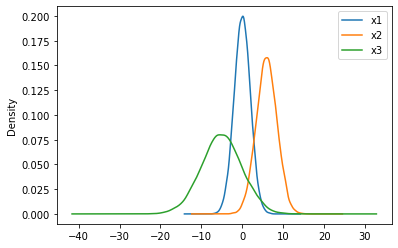

In [4]:
# Plotting the data / Density Plot
df.plot.kde();

In [5]:
#df.x1.plot.kde()

In [6]:
from sklearn.preprocessing import StandardScaler # importing StandardScaler method

In [7]:
scaler = StandardScaler() # Creating an object for method StandardScaler()

In [8]:
df_tf = scaler.fit_transform(df) # Fitting and transforming data using scaler

In [9]:
df1 = pd.DataFrame(df_tf, columns = ['x1', 'x2', 'x3']) # Storing transformed variables in a new dataframe

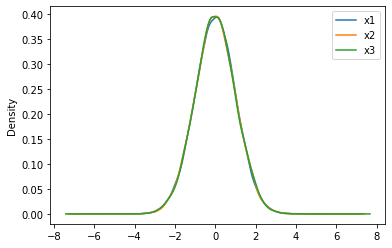

In [10]:
df1.plot.kde(); # Plotting new transformed variables

## 2. MinMax Scaler
One of the most popular
* Calculate - Subtract min of column & div by difference between max & min
* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [11]:
df = pd.DataFrame({
                  'x1': np.random.chisquare(8, 1000),  # Positively skewed
                  'x2': np.random.beta(8, 2, 1000)*40, # Negatively skewed
                  'x3': np.random.normal(50, 3, 1000) # No skewed
                 })

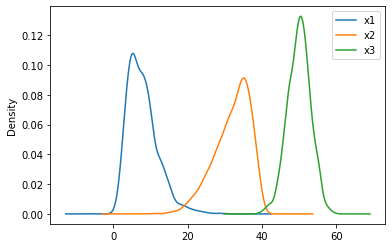

In [12]:
df.plot.kde();

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
df_tf = scaler.fit_transform(df)

In [16]:
df1 = pd.DataFrame(df_tf, columns = ['x1', 'x2', 'x3'])

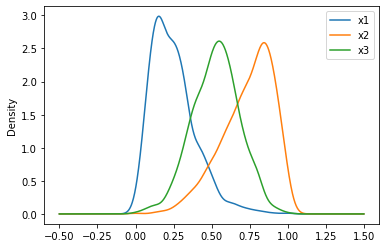

In [17]:
df1.plot.kde()

## 3. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting Median & divide it by difference between 3rd-quartile & 1st-quartile


In [18]:
df = pd.DataFrame({
                  'x1': np.concatenate([np.random.normal(1,1,5), np.random.normal(20,1,500) ]),
                  'x2': np.concatenate([np.random.normal(20,1,500), np.random.normal(80,1,5) ])
                 })

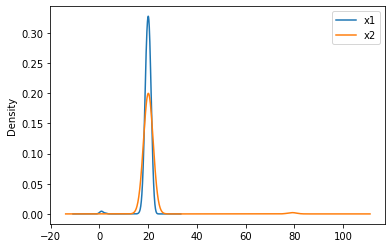

In [19]:
df.plot.kde()

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
scaler = RobustScaler()

In [22]:
df_tf = scaler.fit_transform(df)

In [23]:
df1 = pd.DataFrame(df_tf, columns = ['x1', 'y1'])

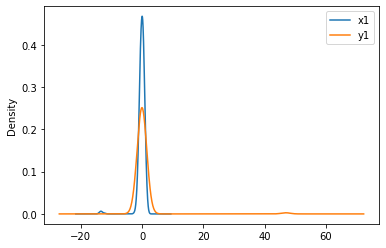

In [24]:
df1.plot.kde();

## 4. Normalizer
* Each parameter value is obtained by dividing by magnitude
* Centralizes data to origin 

In [25]:
df = pd.DataFrame({
                  'x1': np.random.randint(-50, 50, 1000).astype(float),
                  'y1': np.random.randint(-40, 40, 1000).astype(float),
                  'z1': np.random.randint(-70, 70, 1000).astype(float)
                 })

In [26]:
from mpl_toolkits.mplot3d import Axes3D # importing library for 3D plotting 

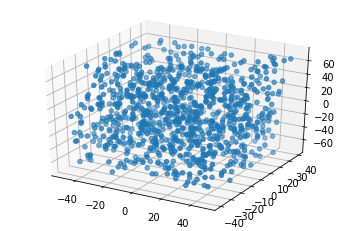

In [27]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [28]:
from sklearn.preprocessing import Normalizer

In [29]:
scaler = Normalizer()

In [30]:
data_tf = scaler.fit_transform(df)

In [31]:
df1 = pd.DataFrame(data_tf, columns = ['x1', 'y1', 'z1'])

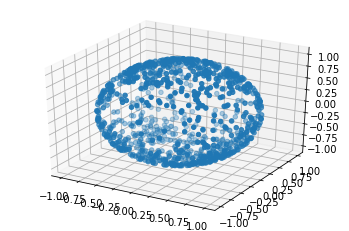

In [32]:
ax = plt.axes(projection = '3d')
ax.scatter3D(df1.x1, df1.y1, df1.z1)

## 5. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [33]:
X = np.array([[1,-1,3],
             [4,0,0],
             [0,8,-9]])

In [34]:
X

array([[ 1, -1,  3],
       [ 4,  0,  0],
       [ 0,  8, -9]])

In [35]:
from sklearn.preprocessing import Binarizer

In [36]:
binarizer = Binarizer(threshold=3) 

In [37]:
df_tf = binarizer.fit_transform(X)
# all the values which are 3 or less than 3 will set to zero 
# and values greater than three will be set to 1

In [38]:
df_tf

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [39]:
features = np.array([[2,3],
                     [4,5],
                    [1,2]])

## 6. Generating Polynomial and Interaction features

* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [40]:
features

array([[2, 3],
       [4, 5],
       [1, 2]])

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly_interaction = PolynomialFeatures(degree = 3, interaction_only=False, include_bias = False) 
# it will generate polynomial as well as interaction features

In [43]:
poly_interaction.fit_transform(features)

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.]])

In [44]:
poly_interaction = PolynomialFeatures(degree = 3, interaction_only=True, include_bias = False)
# it will generate only interaction features

In [45]:
poly_interaction.fit_transform(features)

array([[ 2.,  3.,  6.],
       [ 4.,  5., 20.],
       [ 1.,  2.,  2.]])

## 7. Encoding Categorical Data

#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [46]:
df = pd.DataFrame({
                   'Age':[33,44,22,44,55,22],
                   'Income':['Low','Low','High','Medium','Medium','High']
                 })

In [47]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [48]:
# mapping ordinal varibale values to numeric values
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

In [49]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [50]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

In [51]:
df['size'] = df['size'].map(size_mapping) # Transformed size from categorical to a numeric varibale
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [52]:
# To check what these encoded value stands for:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [53]:
df = pd.DataFrame({
                   'Age':[33,44,22,44,55,22],
                   'Gender':['Male','Female','Male','Female','Male','Male']
                  })

In [54]:
df.Gender.unique() # To check unique values of Gender variable

array(['Male', 'Female'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [56]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [57]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [58]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [59]:
pd.get_dummies(df['Gender'], drop_first= False) # Using pandas get_dummie method for one-hot encoding

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


In [60]:
pd.get_dummies(df['Gender'], drop_first= True)

,Male
0,1
1,0
2,1
3,0
4,1
5,1


## 8. Custom Transformer
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [61]:
from sklearn.preprocessing import FunctionTransformer

In [62]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [63]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [64]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [65]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4
